<a href="https://colab.research.google.com/github/Neo-glitch/TensorFlow-dev-course/blob/master/Mutivariate_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

df = pd.read_csv(csv_path)
df

13568290/13568290 [==============================] - 2s 0us/step


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [3]:
# gets slice of the dataframe
df = df[5::6]

df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70091 entries, 5 to 420545
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date Time        70091 non-null  object 
 1   p (mbar)         70091 non-null  float64
 2   T (degC)         70091 non-null  float64
 3   Tpot (K)         70091 non-null  float64
 4   Tdew (degC)      70091 non-null  float64
 5   rh (%)           70091 non-null  float64
 6   VPmax (mbar)     70091 non-null  float64
 7   VPact (mbar)     70091 non-null  float64
 8   VPdef (mbar)     70091 non-null  float64
 9   sh (g/kg)        70091 non-null  float64
 10  H2OC (mmol/mol)  70091 non-null  float64
 11  rho (g/m**3)     70091 non-null  float64
 12  wv (m/s)         70091 non-null  float64
 13  max. wv (m/s)    70091 non-null  float64
 14  wd (deg)         70091 non-null  float64
dtypes: float64(14), object(1)
memory usage: 8.0+ MB


In [5]:
# converts the index to timestamp
df.index = pd.to_datetime(df["Date Time"], format = '%d.%m.%Y %H:%M:%S')

df[:10]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


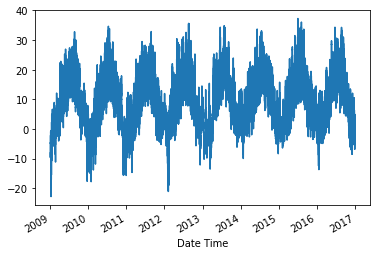

In [6]:
temp = df["T (degC)"]

temp.plot()

In [7]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def format_data(df, window_size = 5):
  df_np = df.to_numpy()
  x = []
  y = []

  # gets data in needed batch, timestep and input feature format
  for i in range(len(df_np) - window_size):
    row = [[a] for a in df_np[i:i+window_size]]
    label = df_np[i+window_size]
    x.append(row)
    y.append(label)

  x, y = np.array(x), np.array(y)

  return x, y

In [8]:
window_size = 5
x, y = format_data(temp, window_size)

x.shape, y.shape

((70086, 5, 1), (70086,))

In [9]:
train_split = 60000
val_split = 65000

x_train, y_train = x[:train_split], y[:train_split]
x_val, y_val = x[train_split: val_split], y[train_split:val_split]
x_test, y_test = x[val_split:], y[val_split:]       

In [10]:
x_train.shape, x_val.shape, x_test.shape

((60000, 5, 1), (5000, 5, 1), (5086, 5, 1))

In [11]:
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import MeanSquaredError, RootMeanSquaredError




model = keras.models.Sequential([
    InputLayer((5, 1)),
    LSTM(64, return_sequences = False),
    Dense(8, "relu"),
    Dense(1, "linear")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [12]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model.compile(loss = keras.losses.MeanSquaredError(), optimizer ="adam", metrics = [RootMeanSquaredError()])
model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10, callbacks = [cp1])

Epoch 1/10
1870/1875 [============================>.] - ETA: 0s - loss: 6.4941 - root_mean_squared_error: 2.5484

1875/1875 [==============================] - 17s 6ms/step - loss: 6.4786 - root_mean_squared_error: 2.5453 - val_loss: 0.5032 - val_root_mean_squared_error: 0.7094
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6899 - root_mean_squared_error: 0.8306 - val_loss: 0.5033 - val_root_mean_squared_error: 0.7095
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6730 - root_mean_squared_error: 0.8203 - val_loss: 0.5771 - val_root_mean_squared_error: 0.7597
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6658 - root_mean_squared_error: 0.8160 - val_loss: 0.5292 - val_root_mean_squared_error: 0.7275
Epoch 5/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.6589 - root_mean_squared_error: 0.8117

1875/1875 [==============================] - 10s 6ms/step - loss: 0.6590 - root_mean_squared_error: 0.8118 - val_loss: 0.4963 - val_root_mean_squared_error: 0.7045
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6578 - root_mean_squared_error: 0.8110 - val_loss: 0.5006 - val_root_mean_squared_error: 0.7075
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6520 - root_mean_squared_error: 0.8075 - val_loss: 0.5195 - val_root_mean_squared_error: 0.7207
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6508 - root_mean_squared_error: 0.8067 - val_loss: 0.4999 - val_root_mean_squared_error: 0.7070
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6477 - root_mean_squared_error: 0.8048 - val_loss: 0.5538 - val_root_mean_squared_error: 0.7442
Epoch 10/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.6496 - root_mean_squared_error: 0.8060

1875/1875 [==============================] - 10s 5ms/step - loss: 0.6491 - root_mean_squared_error: 0.8056 - val_loss: 0.4962 - val_root_mean_squared_error: 0.7044


***Make Predictions***

In [13]:
from tensorflow.keras.models import load_model
model1 = load_model("model1/")

In [14]:
train_predictions = model.predict(x_train).flatten()
train_results = pd.DataFrame(data = {"Train predictions": train_predictions, "Actual": y_train})
train_results

1875/1875 [==============================] - 4s 2ms/step


,Train predictions,Actual
0,-10.037257,-9.67
1,-9.770997,-9.17
2,-8.825891,-8.10
3,-7.415742,-7.66
4,-7.413057,-7.04
...,...,...
59995,6.231207,6.07
59996,7.239090,9.88
59997,12.307089,13.53
59998,15.835634,15.43


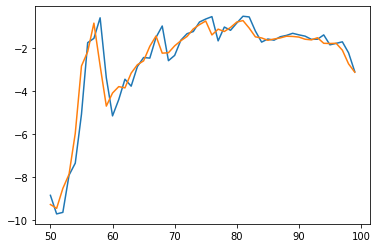

In [15]:
import matplotlib.pyplot as plt
plt.plot(train_results["Train predictions"][50:100])
plt.plot(train_results["Actual"][50:100])

In [16]:
val_predictions = model.predict(x_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

157/157 [==============================] - 1s 2ms/step


,Val Predictions,Actuals
0,15.547829,14.02
1,13.178183,13.67
2,13.053013,12.27
3,11.301405,11.19
4,10.309948,10.85
...,...,...
4995,17.323898,18.27
4996,17.722174,17.85
4997,17.102839,16.65
4998,15.806703,15.85


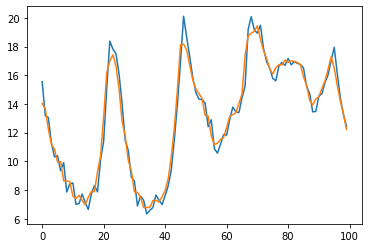

In [17]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

**Working with multivariate Time Series**

In [18]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error

def plot_predictions(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

159/159 [==============================] - 0s 2ms/step


(      Predictions  Actuals
 0       14.249715    13.99
 1       13.125876    13.46
 2       12.805459    12.93
 3       12.368649    12.43
 4       11.961044    12.17
 ...           ...      ...
 5081    -0.973702    -0.98
 5082    -1.373383    -1.40
 5083    -1.569426    -2.75
 5084    -2.988710    -2.89
 5085    -3.023104    -3.93
 
 [5086 rows x 2 columns], 0.6618808545415675)

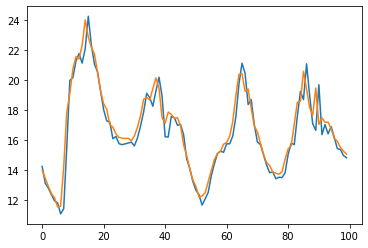

In [19]:
plot_predictions(model, x_test, y_test)

In [19]:
temp_df = pd.DataFrame({"Temperature": temp})
temp_df["Seconds"] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [20]:
day = 60*60*24
year = 365.2425*day


temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917


In [21]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917


In [22]:
def format_multivartiate_data(df, window_size = 6):
  df_as_np = df.to_numpy()
  x= []
  y = []

  for i in range(len(df_as_np) - window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    label = df_as_np[i+window_size][0]  # select the temperature col
    x.append(row)
    y.append(label)
  return np.array(x), np.array(y)

In [23]:
x, y = format_multivartiate_data(temp_df)

In [24]:
x2_train, y2_train = x[:60000], y[:60000]
x2_val, y2_val = x[60000:65000], y[60000:65000]
x2_test, y2_test = x[65000:], y[65000:]
x2_train.shape, y2_train.shape, x2_val.shape, y2_val.shape, x2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

In [25]:
# standardize cols to match
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

def preprocess(x, y):
  x_local = x.copy()
  y_local = y.copy()

  x_local[:,:, 0] = x_scaler.fit_transform(x_local[:,:,0])
  y_local = y_scaler.fit_transform(y_local.reshape(-1, 1)).reshape(y_local.shape)

  return x_local, y_local

In [26]:
x_std_train, y_std_train= preprocess(x2_train, y2_train)
x_std_val, y_std_val = preprocess(x2_val, y2_val)
x_std_test, y_std_test = preprocess(x2_test, y2_test)

In [27]:
model2 = keras.models.Sequential([
    InputLayer(input_shape = (6, 5)),
    LSTM(64, return_sequences = False),
    Dense(8, "relu"),
    Dense(1, "linear")
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17920     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [28]:
from tensorflow.keras.optimizers import Adam

model2.compile(loss=keras.losses.MeanSquaredError(), optimizer="adam", metrics=[RootMeanSquaredError()])

In [29]:
model2.fit(x_std_train, y_std_train, validation_data = (x_std_val, y_std_val), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0025 - root_mean_squared_error: 0.0504 - val_loss: 7.8237e-04 - val_root_mean_squared_error: 0.0280
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 4.0074e-04 - root_mean_squared_error: 0.0200 - val_loss: 4.2439e-04 - val_root_mean_squared_error: 0.0206
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3950e-04 - root_mean_squared_error: 0.0155 - val_loss: 3.6000e-04 - val_root_mean_squared_error: 0.0190
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.9989e-04 - root_mean_squared_error: 0.0141 - val_loss: 2.5140e-04 - val_root_mean_squared_error: 0.0159
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.7673e-04 - root_mean_squared_error: 0.0133 - val_loss: 2.3155e-04 - val_root_mean_squared_error: 0.0152
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7344e-04 - root_

159/159 [==============================] - 1s 2ms/step


(      Predictions   Actuals
 0        0.508153  0.512832
 1        0.497644  0.500467
 2        0.486905  0.488801
 3        0.476032  0.482734
 4        0.479020  0.468269
 ...           ...       ...
 5080     0.182156  0.175922
 5081     0.171983  0.166122
 5082     0.165228  0.134624
 5083     0.131367  0.131358
 5084     0.125736  0.107093
 
 [5085 rows x 2 columns], 0.00030231916225238856)

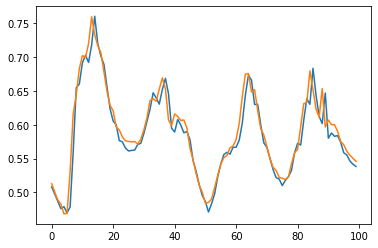

In [30]:
plot_predictions(model2, x_std_test, y_std_test)

In [31]:
# convert back to actual scale
predictions = model2.predict(x_std_test).flatten()

pred_rescaled = y_scaler.inverse_transform(predictions.reshape(-1, 1)).reshape(predictions.shape)

159/159 [==============================] - 0s 2ms/step


In [32]:
pred_rescaled.max()

33.701473

In [33]:
y2_test.max()

34.34

In [34]:
actual_scale_predictions = pd.DataFrame({
    "Predictions": pred_rescaled,
    "Actuals": y2_test
})

actual_scale_predictions

,Predictions,Actuals
0,13.259457,13.46
1,12.809008,12.93
2,12.348761,12.43
3,11.882752,12.17
4,12.010796,11.55
...,...,...
5080,-0.712791,-0.98
5081,-1.148810,-1.40
5082,-1.438318,-2.75
5083,-2.889630,-2.89


In [35]:
# check mae and mse using keras metrics
from tensorflow.keras.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score


print(f"Mean Absolute Error: {mean_absolute_error(y2_test, pred_rescaled).numpy()}")
print(f"Mean Squared Error: {mean_squared_error(y2_test, pred_rescaled).numpy()}")
print(f"R2 score: {r2_score(y2_test, pred_rescaled)}")

Mean Absolute Error: 0.5259471535682678
Mean Squared Error: 0.5553540587425232
R2 score: 0.9920246253568327


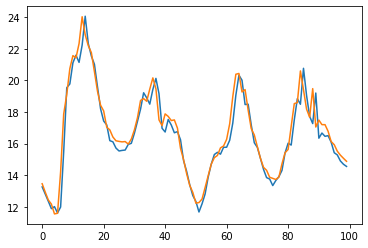

In [36]:
plt.plot(actual_scale_predictions['Predictions'][0:100])
plt.plot(actual_scale_predictions['Actuals'][0:100])

**Working with more than multivariate predictors and target**

In [37]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917


In [50]:
def df_to_multivariate_target(df, window_size= 7):
  df_np = df.to_numpy()
  y = []
  x = []
  for i in range(len(df_np) - window_size):
    row = [r for r in df_np[i:i+window_size]]
    label = [df_np[i+window_size][0], # P (mbar) col
             df_np[i+window_size][1]] # Temperature col
    x.append(row)
    y.append(label)
  return np.array(x), np.array(y)

In [51]:
x3, y3 = df_to_multivariate_target(p_temp_df)

x3.shape, y3.shape

((70084, 7, 6), (70084, 2))

In [52]:
x3_train, y3_train = x3[:60000], y3[:60000]
x3_val, y3_val = x3[60000:65000], y3[60000:65000]
x3_test, y3_test = x3[65000:], y3[65000:]
x3_train.shape, y3_train.shape, x3_val.shape, y3_val.shape, x3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

In [53]:
feature_scaler = MinMaxScaler()   # to standardize feature
target_scaler = MinMaxScaler()    # to standardize target

In [54]:
def scale_feature_and_target(x, y):
  x_local = x.copy()
  y_local = y.copy()

  # sure way to scale 3d data
  x_local = feature_scaler.fit_transform(x_local.reshape(x_local.shape[0], -1)).reshape(x_local.shape)
  y_local = target_scaler.fit_transform(y_local)

  return np.array(x_local), np.array(y_local)

In [55]:
x3_std_train, y3_std_train = scale_feature_and_target(x3_train, y3_train)
x3_std_val, y3_std_val = scale_feature_and_target(x3_val, y3_val)
x3_std_test, y3_std_test = scale_feature_and_target(x3_test, y3_test)

x3_std_train.shape, x3_std_val.shape, x3_std_test.shape, y3_std_train.shape, y3_std_val.shape, y3_std_test.shape

((60000, 7, 6), (5000, 7, 6), (5084, 7, 6), (60000, 2), (5000, 2), (5084, 2))

In [56]:
model3 = keras.models.Sequential([
    InputLayer((7, 6)),
    LSTM(64, return_sequences = False),
    Dense(8, "relu"),
    Dense(2, "linear")
])

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                18176     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


In [57]:
cp3 = ModelCheckpoint("model5/", save_best_only=True)
model3.compile(loss = keras.losses.MeanSquaredError(), optimizer = "adam", metrics=[RootMeanSquaredError()])

In [58]:
model3.fit(x3_std_train, y3_std_train, validation_data = (x3_std_val, y3_std_val), epochs = 10, callbacks = [cp3])

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.0711

1875/1875 [==============================] - 12s 6ms/step - loss: 0.0051 - root_mean_squared_error: 0.0711 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0340
Epoch 2/10
1865/1875 [============================>.] - ETA: 0s - loss: 3.5379e-04 - root_mean_squared_error: 0.0188

1875/1875 [==============================] - 10s 5ms/step - loss: 3.5336e-04 - root_mean_squared_error: 0.0188 - val_loss: 6.5623e-04 - val_root_mean_squared_error: 0.0256
Epoch 3/10
1863/1875 [============================>.] - ETA: 0s - loss: 2.3105e-04 - root_mean_squared_error: 0.0152

1875/1875 [==============================] - 11s 6ms/step - loss: 2.3124e-04 - root_mean_squared_error: 0.0152 - val_loss: 4.7037e-04 - val_root_mean_squared_error: 0.0217
Epoch 4/10
1861/1875 [============================>.] - ETA: 0s - loss: 1.6123e-04 - root_mean_squared_error: 0.0127

1875/1875 [==============================] - 10s 6ms/step - loss: 1.6090e-04 - root_mean_squared_error: 0.0127 - val_loss: 2.9177e-04 - val_root_mean_squared_error: 0.0171
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2941e-04 - root_mean_squared_error: 0.0114 - val_loss: 3.1336e-04 - val_root_mean_squared_error: 0.0177
Epoch 6/10
1870/1875 [============================>.] - ETA: 0s - loss: 1.1780e-04 - root_mean_squared_error: 0.0109

1875/1875 [==============================] - 10s 5ms/step - loss: 1.1771e-04 - root_mean_squared_error: 0.0108 - val_loss: 2.4806e-04 - val_root_mean_squared_error: 0.0157
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0970e-04 - root_mean_squared_error: 0.0105 - val_loss: 3.0593e-04 - val_root_mean_squared_error: 0.0175
Epoch 8/10
1874/1875 [============================>.] - ETA: 0s - loss: 1.0489e-04 - root_mean_squared_error: 0.0102

1875/1875 [==============================] - 10s 5ms/step - loss: 1.0487e-04 - root_mean_squared_error: 0.0102 - val_loss: 2.4110e-04 - val_root_mean_squared_error: 0.0155
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0303e-04 - root_mean_squared_error: 0.0102 - val_loss: 2.4974e-04 - val_root_mean_squared_error: 0.0158
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0044e-04 - root_mean_squared_error: 0.0100 - val_loss: 2.5153e-04 - val_root_mean_squared_error: 0.0159


In [59]:
def plot_predictions2(model, x, y, start = 0, end=100):
  predictions = model.predict(x)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]

  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

159/159 [==============================] - 1s 2ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.504709,0.500467,0.244330,0.234746
1,0.495049,0.488801,0.247020,0.240568
2,0.484865,0.482734,0.252356,0.248486
3,0.480804,0.468269,0.260944,0.261761
4,0.467554,0.469202,0.275232,0.261761
...,...,...,...,...
95,0.563244,0.560896,0.316554,0.307173
96,0.555124,0.555063,0.316496,0.310433
97,0.550596,0.550397,0.319181,0.310433
98,0.548408,0.545964,0.320865,0.310200


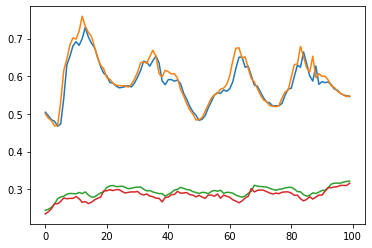

In [60]:
plot_predictions2(model3, x3_std_test, y3_std_test)

In [89]:
# helper to rescale predictions in actual scale
def rescale_target_and_plot(model, x_std, y_not_std, start = 0, end = 100):
  pred_std = model.predict(x_std)

  rescaled_pred = target_scaler.inverse_transform(pred_std)
  p_pred, t_pred = rescaled_pred[:, 0], rescaled_pred[:,1]
  p_actual, t_actual = y_not_std[:, 0], y_not_std[:, 1]

  # print(p_pred.shape)
  # print(p_actual.shape)
  
  df = pd.DataFrame({
      "Temperature Predictions": t_pred,
      "Temperature Actuals": t_actual,
      "Pressure Predictions": p_pred,
      "Pressure Actuals": p_actual
  })
  
  plt.title("Temperature chart with predictions")
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  
  plt.figure()
  plt.title("Pressure chart with predictions")
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  

  
  print(f"\nTemperature Mean Abosoluter Error: {keras.metrics.mean_absolute_error(t_actual, t_pred).numpy()}")
  print(f"Temperature Squared Error: {keras.metrics.mean_squared_error(t_actual, t_pred).numpy()}")
  print(f"Temperature R2 score: {r2_score(t_actual, t_pred)}")

  print(f"\nPressure Mean Abosoluter Error: {keras.metrics.mean_absolute_error(p_actual, p_pred).numpy()}")
  print(f"Pressure Mean Squared Error: {keras.metrics.mean_squared_error(p_actual, p_pred).numpy()}")
  print(f"Pressuer R2 score: {r2_score(p_actual, p_pred)}\n")

  return df[start:end]

159/159 [==============================] - 0s 2ms/step

Temperature Mean Abosoluter Error: 0.7078418731689453
Temperature Squared Error: 1.1084835529327393
Temperature R2 score: 0.9840843009076193

Pressure Mean Abosoluter Error: 0.5394874811172485
Pressure Mean Squared Error: 1.4330075979232788
Pressuer R2 score: 0.9745345034160233



,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,13.111808,12.93,982.841553,982.43
1,12.697811,12.43,982.957031,982.68
2,12.261299,12.17,983.186157,983.02
3,12.087274,11.55,983.554871,983.59
4,11.519369,11.59,984.168396,983.59
...,...,...,...,...
95,15.620658,15.52,985.942810,985.54
96,15.272596,15.27,985.940369,985.68
97,15.078540,15.07,986.055664,985.68
98,14.984751,14.88,986.127930,985.67


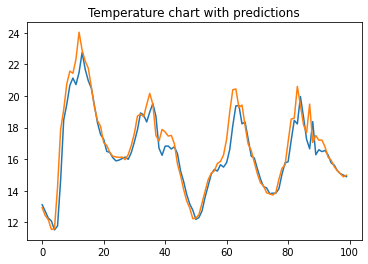

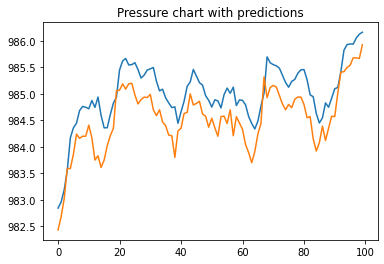

In [90]:
# pred = model3.predict(x3_test)

# pred = target_scaler.inverse_transform(pred)

# pred.shape
# rescaled_pred = target_scaler.inverse_transform(pred)
rescale_target_and_plot(model3, x3_std_test, y3_test)